In [58]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score, classification_report
import seaborn as sns

In [59]:
image_directory = './data'
data = []

for name in os.listdir(image_directory):
    if name.endswith(".jpg"):
        age = int(name.split("_")[0])
        data.append({"name":name,"age":age})

dataFrame = pd.DataFrame(data)



In [60]:
dataFrame

,name,age
0,100_1_0_20170110183726390.jpg,100
1,100_1_2_20170105174847679.jpg,100
2,100_1_2_20170110182836729.jpg,100
3,101_1_2_20170105174739309.jpg,101
4,10_0_0_20161220222308131.jpg,10
...,...,...
10132,9_1_3_20161220222856346.jpg,9
10133,9_1_3_20170104222949455.jpg,9
10134,9_1_4_20170103200637399.jpg,9
10135,9_1_4_20170103200814791.jpg,9


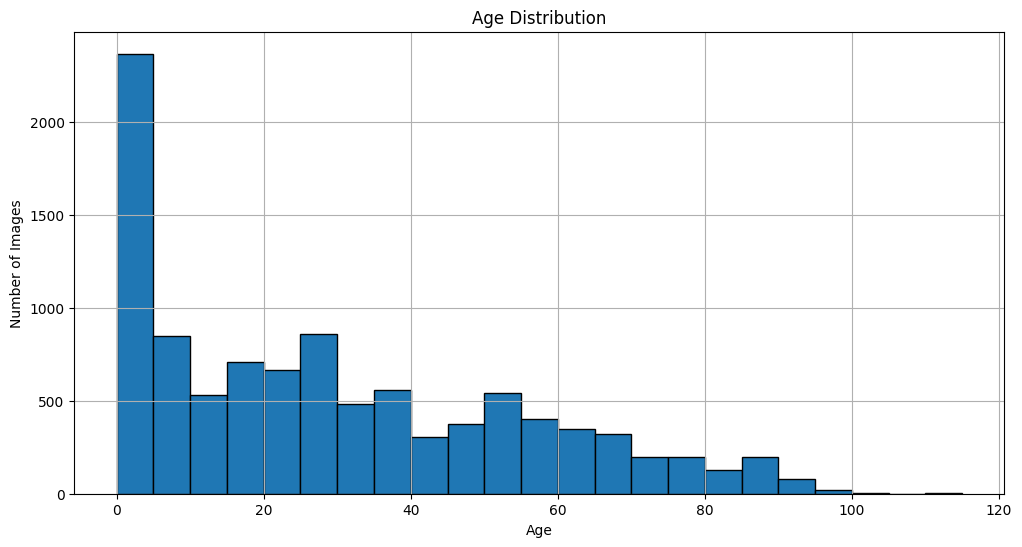

In [61]:
plt.figure(figsize=(12, 6))
plt.hist(dataFrame['age'], bins=range(0, 120, 5), edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Images")
plt.grid(True)
plt.show()

In [62]:
dataFrame.describe()

,age
count,10137.000000
mean,28.890007
std,24.973293
min,1.000000
25%,5.000000
50%,24.000000
75%,49.000000
max,110.000000


In [63]:
train_images,temp_stor = train_test_split(dataFrame,test_size = 0.3, random_state= 42)
test_images, val_images =  train_test_split(temp_stor,test_size = 0.5, random_state= 42)

In [64]:
train_images.shape,test_images.shape,val_images.shape

((7095, 2), (1521, 2), (1521, 2))

In [65]:
max_age = train_images['age'].max()
train_images['age_scaled'] = train_images['age'] / max_age
val_images['age_scaled'] = val_images['age'] / max_age
test_images['age_scaled'] = test_images['age'] / max_age


In [66]:
image_size = (124,124)

train = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest'

)

test = ImageDataGenerator( rescale = 1./255)

train_data = train.flow_from_dataframe(
    dataframe = train_images,
    directory = image_directory,
    x_col = "name",
    y_col = "age_scaled",
    target_size = image_size,
    batch_size = 32,
    class_mode='raw'
)

val_data = test.flow_from_dataframe(
    dataframe = val_images,
    directory = image_directory,
    x_col = "name",
    y_col = "age_scaled",
    target_size = image_size,
    batch_size = 32,
    class_mode='raw'
    
)



test_data = test.flow_from_dataframe(
    dataframe = test_images,
    directory = image_directory,
    x_col = "name",
    y_col = "age_scaled",
    target_size = image_size,
    batch_size = 32,
    class_mode='raw',
    shuffle=False
)





Found 7095 validated image filenames.
Found 1521 validated image filenames.
Found 1521 validated image filenames.


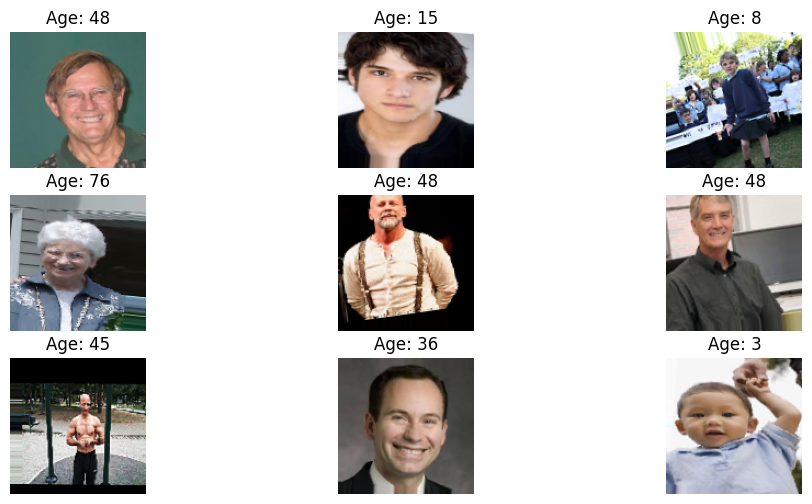

In [ ]:
def show(generator, max_age=100):
    ch = next(generator)
    images, ages = ch
    plt.figure(figsize=(12, 6))
    for i in range(min(9, len(images))):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        real_age = ages[i] * max_age
        plt.title(f"Age: {real_age:.0f}")
        plt.axis("off")
    plt.show()

show(train_data, max_age=100)  


In [68]:
model = models.Sequential([
    layers.Input(shape=(124, 124, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  
])

In [69]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 122, 122, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 59, 59, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 27, 27, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     1,384,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,477,825 (5.64 MB)

 Trainable params: 1,477,825 (5.64 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
model.compile(
    optimizer ='adam',
    loss='mse',
    metrics = ['mae']
)

In [71]:
hist = model.fit(
    train_data,
    validation_data= val_data,
    epochs = 5
)

c:\Users\USER\OneDrive\Desktop\New folder\tenserflow intro\testenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
222/222 ━━━━━━━━━━━━━━━━━━━━ 169s 748ms/step - loss: 0.1429 - mae: 0.2349 - val_loss: 0.0423 - val_mae: 0.1740
Epoch 2/5
222/222 ━━━━━━━━━━━━━━━━━━━━ 139s 627ms/step - loss: 0.0440 - mae: 0.1697 - val_loss: 0.0393 - val_mae: 0.1604
Epoch 3/5
222/222 ━━━━━━━━━━━━━━━━━━━━ 141s 634ms/step - loss: 0.0422 - mae: 0.1649 - val_loss: 0.0375 - val_mae: 0.1535
Epoch 4/5
222/222 ━━━━━━━━━━━━━━━━━━━━ 138s 622ms/step - loss: 0.0396 - mae: 0.1581 - val_loss: 0.0376 - val_mae: 0.1486
Epoch 5/5
222/222 ━━━━━━━━━━━━━━━━━━━━ 143s 643ms/step - loss: 0.0397 - mae: 0.1570 - val_loss: 0.0386 - val_mae: 0.1499


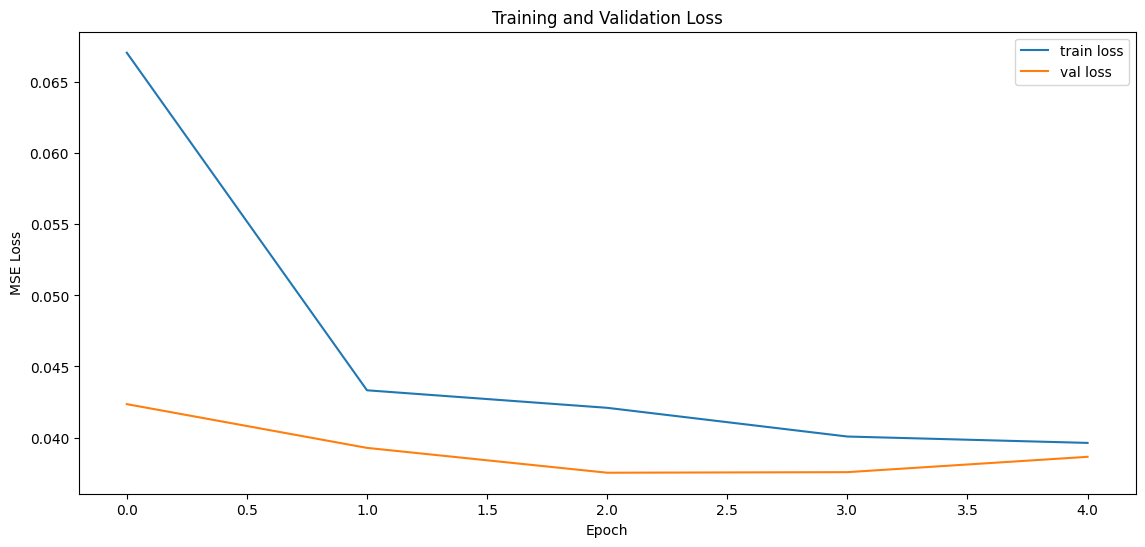

In [105]:
plt.figure(figsize=(30, 6))  
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [80]:
loss, mae = model.evaluate(test_data)

48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 212ms/step - loss: 0.0410 - mae: 0.1532


In [78]:
pred = model.predict(test_data)

c:\Users\USER\OneDrive\Desktop\New folder\tenserflow intro\testenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


48/48 ━━━━━━━━━━━━━━━━━━━━ 25s 530ms/step


In [83]:
true_labels = np.concatenate([test_data[i][1] for i in range(len(test_data))])


In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [88]:
mae = mean_absolute_error(true_labels, pred)

In [89]:
print(mae)

0.14772283698243277


In [90]:
mse = mean_squared_error(true_labels, pred)

In [92]:
print(mse)

0.03832397679730234
